In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
labels = pd.read_csv('../csv/train_labels.csv')
labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [3]:
values = pd.read_csv('../csv/train_values.csv')
values.head(10).T

,0,1,2,3,4,5,6,7,8,9
building_id,802906,28830,94947,590882,201944,333020,728451,475515,441126,989500
geo_level_1_id,6,8,21,22,11,8,9,20,0,26
geo_level_2_id,487,900,363,418,131,558,475,323,757,886
geo_level_3_id,12198,2812,8973,10694,1488,6089,12066,12236,7219,994
count_floors_pre_eq,2,2,2,2,3,2,2,2,2,1
age,30,10,10,10,30,10,25,0,15,0
area_percentage,6,8,5,6,8,9,3,8,8,13
height_percentage,5,7,5,5,9,5,4,6,6,4
land_surface_condition,t,o,t,t,t,t,n,t,t,t
foundation_type,r,r,r,r,r,r,r,w,r,i


# Materiales más Viejos

Vamos a analizar que materiales utilizaban los edificios más viejos

In [53]:
cols = list(values.filter(like="has_superstructure").columns)

In [67]:
old_by_material = values[(values["age"] == 100) | (values["age"] == 200) | (values["age"] == 995)]\
                  [cols + ["age"]].groupby("age").agg("sum")
old_by_material

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
age,,,,,,,,,,,
100,541,544,60,12,675,97,346,76,26,0,11
200,20,46,27,1,33,6,28,0,1,0,0
995,194,1037,68,22,132,81,481,144,45,20,22


<AxesSubplot:xlabel='age'>

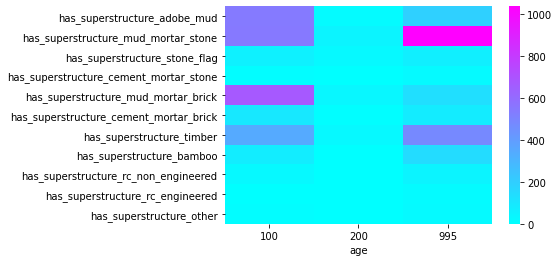

In [72]:
sns.heatmap(old_by_material.T, cmap="cool")

Podemos ver como, cuanto más viejo es un edificio, más tiende a usar adobe_mud, mud_mortar_stone y mud_mortar_brick y timber. Particularmente con los edificios milenarios, esto se acentúa en el caso de mud_mortar_stone.

# Peores Materiales

Como queremos que la comparación sea más justa, tomamos solo las estructuras que son relativamente jóvenes.

In [4]:
values_m = values[values["age"] < 75]
values_m

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,0


In [5]:
merged = values_m.merge(labels, on="building_id")
merged.head(5)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [6]:
desired_cols = list(values_m.filter(like="has_superstructure").columns) + ["damage_grade"]
desired_cols

['has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'damage_grade']

In [7]:
merged = merged[desired_cols]
merged

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
0,1,1,0,0,0,0,0,0,0,0,0,3
1,0,1,0,0,0,0,0,0,0,0,0,2
2,0,1,0,0,0,0,0,0,0,0,0,3
3,0,1,0,0,0,0,1,1,0,0,0,2
4,1,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
251195,0,1,0,0,0,0,0,0,0,0,0,2
251196,0,1,0,0,0,0,0,0,0,0,0,3
251197,0,1,0,0,0,0,0,0,0,0,0,3
251198,0,0,0,0,0,1,0,0,0,0,0,2


In [8]:
merged = merged.groupby("damage_grade").agg("sum")
merged

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
damage_grade,,,,,,,,,,,
1,573,8590,174,827,616,7074,7533,2792,3841,2646,647
2,12146,111001,4321,3185,9355,10944,38615,13655,5702,1390,2178
3,7595,73975,4101,663,4266,996,17881,5117,1361,74,958


In [9]:
merged = merged.T
merged

damage_grade,1,2,3
has_superstructure_adobe_mud,573,12146,7595
has_superstructure_mud_mortar_stone,8590,111001,73975
has_superstructure_stone_flag,174,4321,4101
has_superstructure_cement_mortar_stone,827,3185,663
has_superstructure_mud_mortar_brick,616,9355,4266
has_superstructure_cement_mortar_brick,7074,10944,996
has_superstructure_timber,7533,38615,17881
has_superstructure_bamboo,2792,13655,5117
has_superstructure_rc_non_engineered,3841,5702,1361
has_superstructure_rc_engineered,2646,1390,74


In [10]:
merged["casos_totales"] = merged[1] + merged[2] + merged[3]
merged["puntaje_total"] = merged[1] + merged[2] * 2 + merged[3] * 3
merged["damage_grade_avg"] = merged["puntaje_total"] / merged["casos_totales"]
merged

damage_grade,1,2,3,casos_totales,puntaje_total,damage_grade_avg
has_superstructure_adobe_mud,573,12146,7595,20314,47650,2.345673
has_superstructure_mud_mortar_stone,8590,111001,73975,193566,452517,2.337792
has_superstructure_stone_flag,174,4321,4101,8596,21119,2.456840
has_superstructure_cement_mortar_stone,827,3185,663,4675,9186,1.964920
has_superstructure_mud_mortar_brick,616,9355,4266,14237,32124,2.256374
has_superstructure_cement_mortar_brick,7074,10944,996,19014,31950,1.680341
has_superstructure_timber,7533,38615,17881,64029,138406,2.161614
has_superstructure_bamboo,2792,13655,5117,21564,45453,2.107819
has_superstructure_rc_non_engineered,3841,5702,1361,10904,19328,1.772561
has_superstructure_rc_engineered,2646,1390,74,4110,5648,1.374209


<AxesSubplot:>

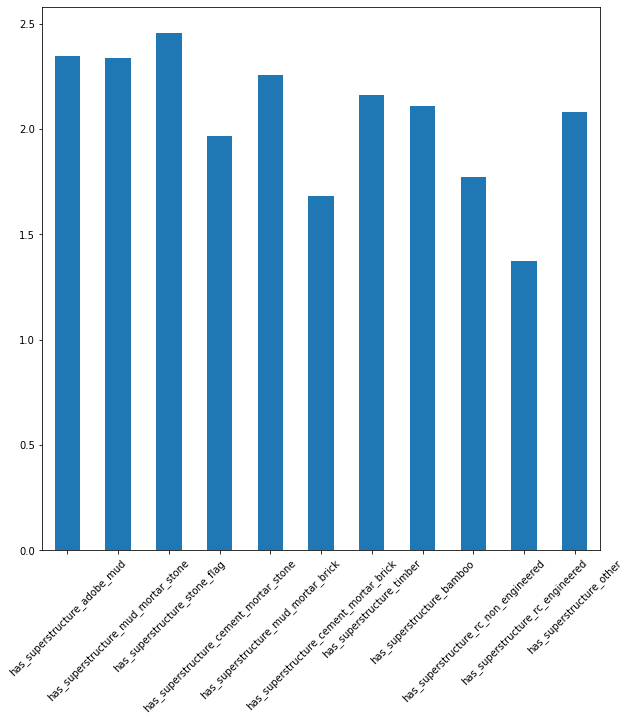

In [11]:
merged["damage_grade_avg"].plot(kind="bar", figsize = (10,10), rot = 45)

<AxesSubplot:>

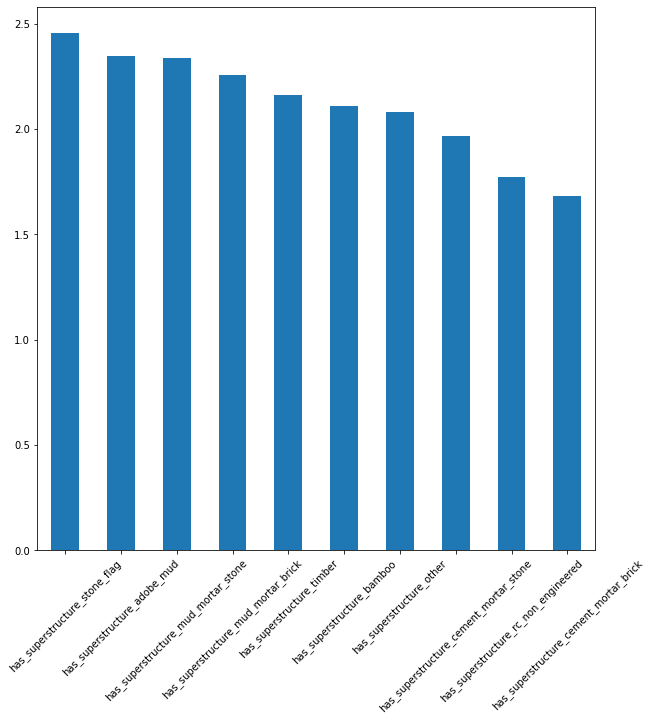

In [12]:
ordenado = merged["damage_grade_avg"].nlargest(10)
ordenado.plot(kind="bar", figsize = (10,10), rot = 45)

In [13]:
merged

damage_grade,1,2,3,casos_totales,puntaje_total,damage_grade_avg
has_superstructure_adobe_mud,573,12146,7595,20314,47650,2.345673
has_superstructure_mud_mortar_stone,8590,111001,73975,193566,452517,2.337792
has_superstructure_stone_flag,174,4321,4101,8596,21119,2.456840
has_superstructure_cement_mortar_stone,827,3185,663,4675,9186,1.964920
has_superstructure_mud_mortar_brick,616,9355,4266,14237,32124,2.256374
has_superstructure_cement_mortar_brick,7074,10944,996,19014,31950,1.680341
has_superstructure_timber,7533,38615,17881,64029,138406,2.161614
has_superstructure_bamboo,2792,13655,5117,21564,45453,2.107819
has_superstructure_rc_non_engineered,3841,5702,1361,10904,19328,1.772561
has_superstructure_rc_engineered,2646,1390,74,4110,5648,1.374209


Podemos segregar nuestros resultados en función de:
- materiales orgánicos: adobe, timber, bamboo.
- materiales inorgánicos: mud_mortar_stone, stone_flag, cement_mortar_stone, mud_mortar_brick

# Peores Orgánicos

<AxesSubplot:>

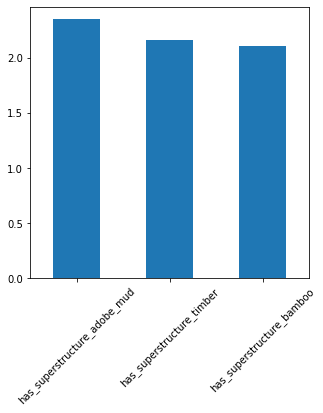

In [14]:
merged.T[["has_superstructure_adobe_mud", "has_superstructure_timber", "has_superstructure_bamboo"]]\
      .T["damage_grade_avg"].plot(kind="bar", figsize = (5,5), rot = 45)

# Peores Inorgánicos

<AxesSubplot:>

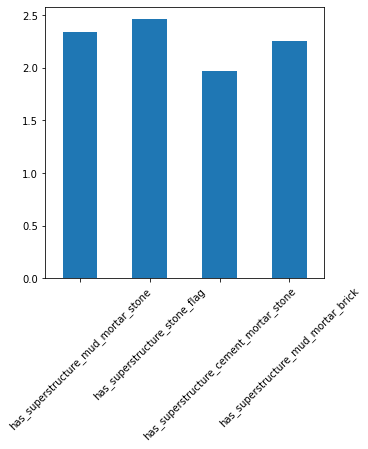

In [15]:
merged.T[["has_superstructure_mud_mortar_stone", "has_superstructure_stone_flag",\
          "has_superstructure_cement_mortar_stone", "has_superstructure_mud_mortar_brick"]]\
      .T["damage_grade_avg"].plot(kind="bar", figsize = (5,5), rot = 45)

Puede resultar útil ver las correlaciones entre el uso_secundario y:
- edad promedio
- material como mapa de calor donde el eje z tiene el promedio del daño
- promedio de pisos

# Edad Promedio

In [16]:
sec_cols = list(values.filter(like="has_secondary_use").columns) + ["age"]
sec_cols

['has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other',
 'age']

In [17]:
ages = values[sec_cols].groupby("age").agg("sum").T
ages

age,0,5,10,15,20,25,30,35,40,45,...,160,165,170,175,180,185,190,195,200,995
has_secondary_use,3296,4592,4624,3941,3396,2372,1869,1107,1067,528,...,0,0,0,0,0,0,0,0,20,154
has_secondary_use_agriculture,1364,2079,2532,2365,2122,1624,1240,741,756,396,...,0,0,0,0,0,0,0,0,15,73
has_secondary_use_hotel,1379,1781,1507,1104,886,530,456,242,222,91,...,0,0,0,0,0,0,0,0,4,53
has_secondary_use_rental,344,447,346,264,223,98,97,67,53,22,...,0,0,0,0,0,0,0,0,0,24
has_secondary_use_institution,47,59,42,37,18,17,9,4,4,0,...,0,0,0,0,0,0,0,0,0,1
has_secondary_use_school,8,31,19,7,18,6,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
has_secondary_use_industry,43,67,39,31,27,16,13,11,4,3,...,0,0,0,0,0,0,0,0,0,0
has_secondary_use_health_post,10,8,11,6,6,1,1,2,0,1,...,0,0,0,0,0,0,0,0,0,0
has_secondary_use_gov_office,7,6,7,5,4,4,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
has_secondary_use_use_police,2,7,3,4,4,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
ages["puntaje"] = ages[0]
ages["totales"] = ages[0]
for i in range(5,75,5):
    ages["puntaje"] += ages[i] * i
    ages["totales"] += ages[i]
ages["avg"] = ages["puntaje"] / ages["totales"]
ages["avg"]

has_secondary_use                17.803628
has_secondary_use_agriculture    20.156705
has_secondary_use_hotel          14.457934
has_secondary_use_rental         14.299310
has_secondary_use_institution    12.115702
has_secondary_use_school         13.010638
has_secondary_use_industry       14.556818
has_secondary_use_health_post    13.645833
has_secondary_use_gov_office     13.837838
has_secondary_use_use_police     13.500000
has_secondary_use_other          18.791159
Name: avg, dtype: float64

<AxesSubplot:>

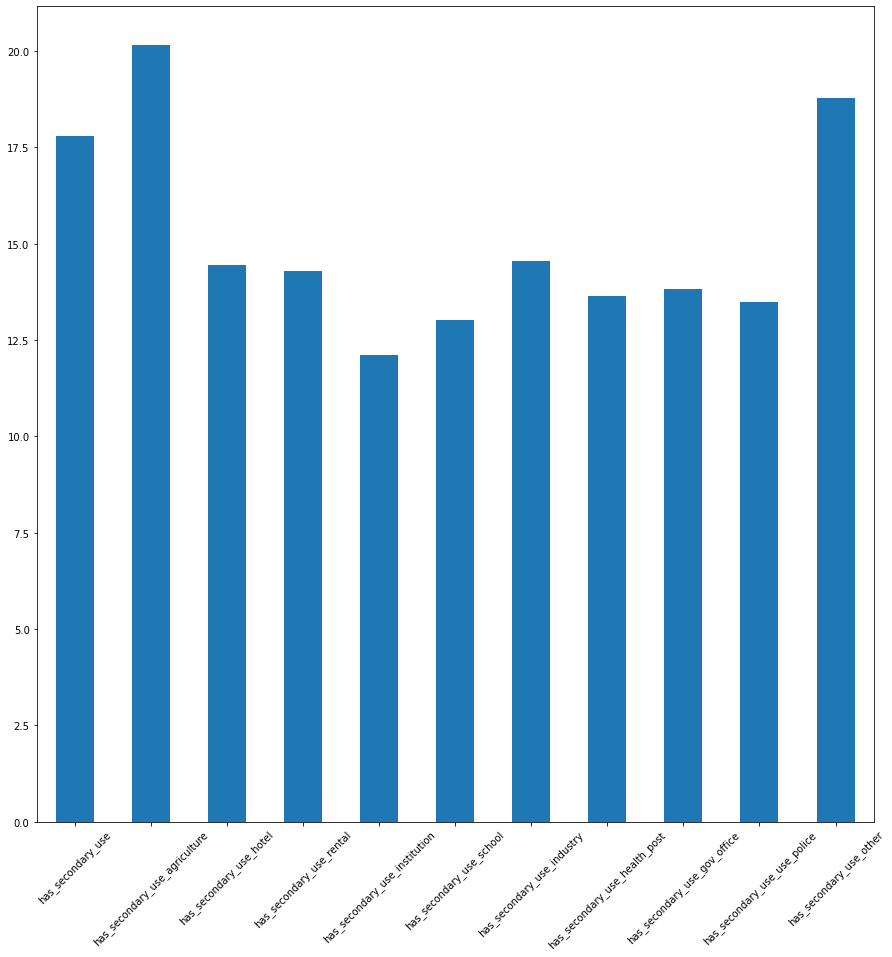

In [19]:
ages["avg"].plot(kind="bar", rot=45, figsize = (15,15))

# Promedio de Pisos

In [20]:
sec_cols = list(values.filter(like="has_secondary_use_").columns) + ["count_floors_pre_eq"]
sec_cols

['has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other',
 'count_floors_pre_eq']

In [21]:
floors = values[sec_cols].groupby("count_floors_pre_eq").agg("sum").T
floors

count_floors_pre_eq,1,2,3,4,5,6,7,8,9
has_secondary_use_agriculture,1867,11177,3679,48,3,2,1,0,0
has_secondary_use_hotel,1524,3794,2187,809,329,96,23,1,0
has_secondary_use_rental,416,831,562,195,90,15,2,0,0
has_secondary_use_institution,31,108,73,20,8,4,1,0,0
has_secondary_use_school,21,34,23,9,4,3,0,0,0
has_secondary_use_industry,90,116,46,19,7,0,1,0,0
has_secondary_use_health_post,6,22,15,3,3,0,0,0,0
has_secondary_use_gov_office,2,14,16,5,1,0,0,0,0
has_secondary_use_use_police,3,9,9,2,0,0,0,0,0
has_secondary_use_other,185,885,223,21,16,3,1,0,0


In [22]:
floors["puntaje"] = floors[1]
floors["totales"] = floors[1]
for i in range(1,10):
    floors["puntaje"] += floors[i] * i
    floors["totales"] += floors[i]
floors["avg"] = floors["puntaje"] / floors["totales"]
floors["avg"]

has_secondary_use_agriculture    2.003379
has_secondary_use_hotel          2.218625
has_secondary_use_rental         2.182034
has_secondary_use_institution    2.347826
has_secondary_use_school         2.200000
has_secondary_use_industry       1.810298
has_secondary_use_health_post    2.327273
has_secondary_use_gov_office     2.625000
has_secondary_use_use_police     2.269231
has_secondary_use_other          1.973667
Name: avg, dtype: float64

<AxesSubplot:>

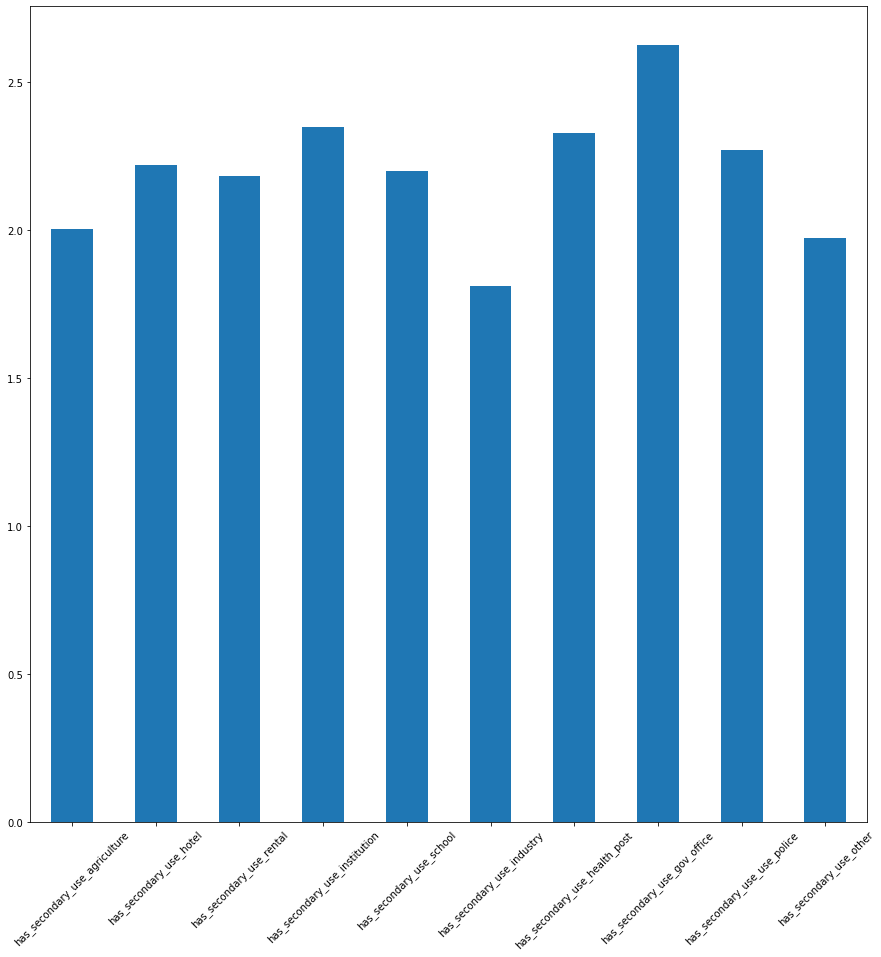

In [23]:
floors["avg"].plot(kind="bar", rot=45, figsize = (15,15))

# Daño en función del material y uso secundario

In [24]:
dmg_cols = list(values.filter(like="has_secondary_use_").columns) + \
           list(values.filter(like="has_superstructure_").columns) + ["damage_grade"]
dmg_cols

['has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'damage_grade']

In [25]:
special_dmg = values.merge(labels, on="building_id")[dmg_cols]
special_dmg

,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
260597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
260598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
260599,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2


In [26]:
special_dmg.groupby("damage_grade").agg("sum")

,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,...,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
damage_grade,,,,,,,,,,,,,,,,,,,,,
1,829,2216,877,99,30,59,12,13,4,175,...,8760,182,829,623,7105,7642,2839,3857,2656,656
2,10679,5058,1051,129,47,152,32,21,12,852,...,113947,4534,3248,11698,11421,40187,14001,5832,1402,2248
3,5269,1489,183,17,17,68,5,4,7,307,...,75854,4231,675,5440,1089,18621,5314,1410,75,1001


Faltar armar heatmap jaja salu2